<a href="https://colab.research.google.com/github/Grigoriy-D/Bitcoin-Scalping-using-Neural-Network/blob/main/vanillaa_stocks_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Imports

In [1]:
!pip install --quiet yfinance

In [2]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis,skew
from scipy import stats
import yfinance as yf

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Data Extraction

In [4]:
stock_name = "BTC-USD"

In [6]:
data = yf.download(tickers=stock_name,
 period="5d",
 interval="1m")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-09-14 00:00:00+00:00,60544.226562,60544.226562,60544.226562,60544.226562,60544.226562,0
2024-09-14 00:02:00+00:00,60580.953125,60580.953125,60580.953125,60580.953125,60580.953125,7041024
2024-09-14 00:03:00+00:00,60571.500000,60571.500000,60571.500000,60571.500000,60571.500000,3282944
2024-09-14 00:04:00+00:00,60603.417969,60603.417969,60603.417969,60603.417969,60603.417969,7403520
2024-09-14 00:05:00+00:00,60591.789062,60591.789062,60591.789062,60591.789062,60591.789062,17838080


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-09-18 10:30:00+00:00,59672.343750,59672.343750,59672.343750,59672.343750,59672.343750,0
2024-09-18 10:31:00+00:00,59732.132812,59732.132812,59732.132812,59732.132812,59732.132812,4075520
2024-09-18 10:32:00+00:00,59756.554688,59756.554688,59756.554688,59756.554688,59756.554688,2166784
2024-09-18 10:33:00+00:00,59775.160156,59775.160156,59775.160156,59775.160156,59775.160156,16760832
2024-09-18 10:35:00+00:00,59762.308594,59762.308594,59762.308594,59762.308594,59762.308594,79187968


In [11]:
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   index      5525 non-null   int64              
 1   Datetime   5525 non-null   datetime64[ns, UTC]
 2   Open       5525 non-null   float64            
 3   High       5525 non-null   float64            
 4   Low        5525 non-null   float64            
 5   Close      5525 non-null   float64            
 6   Adj Close  5525 non-null   float64            
 7   Volume     5525 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 345.4 KB


In [12]:
sns.set(rc={'figure.figsize':(35,10)})
data.tail()

,index,Datetime,Open,High,Low,Close,Adj Close,Volume
5520,5520,2024-09-18 10:30:00+00:00,59672.343750,59672.343750,59672.343750,59672.343750,59672.343750,0
5521,5521,2024-09-18 10:31:00+00:00,59732.132812,59732.132812,59732.132812,59732.132812,59732.132812,4075520
5522,5522,2024-09-18 10:32:00+00:00,59756.554688,59756.554688,59756.554688,59756.554688,59756.554688,2166784
5523,5523,2024-09-18 10:33:00+00:00,59775.160156,59775.160156,59775.160156,59775.160156,59775.160156,16760832
5524,5524,2024-09-18 10:35:00+00:00,59762.308594,59762.308594,59762.308594,59762.308594,59762.308594,79187968


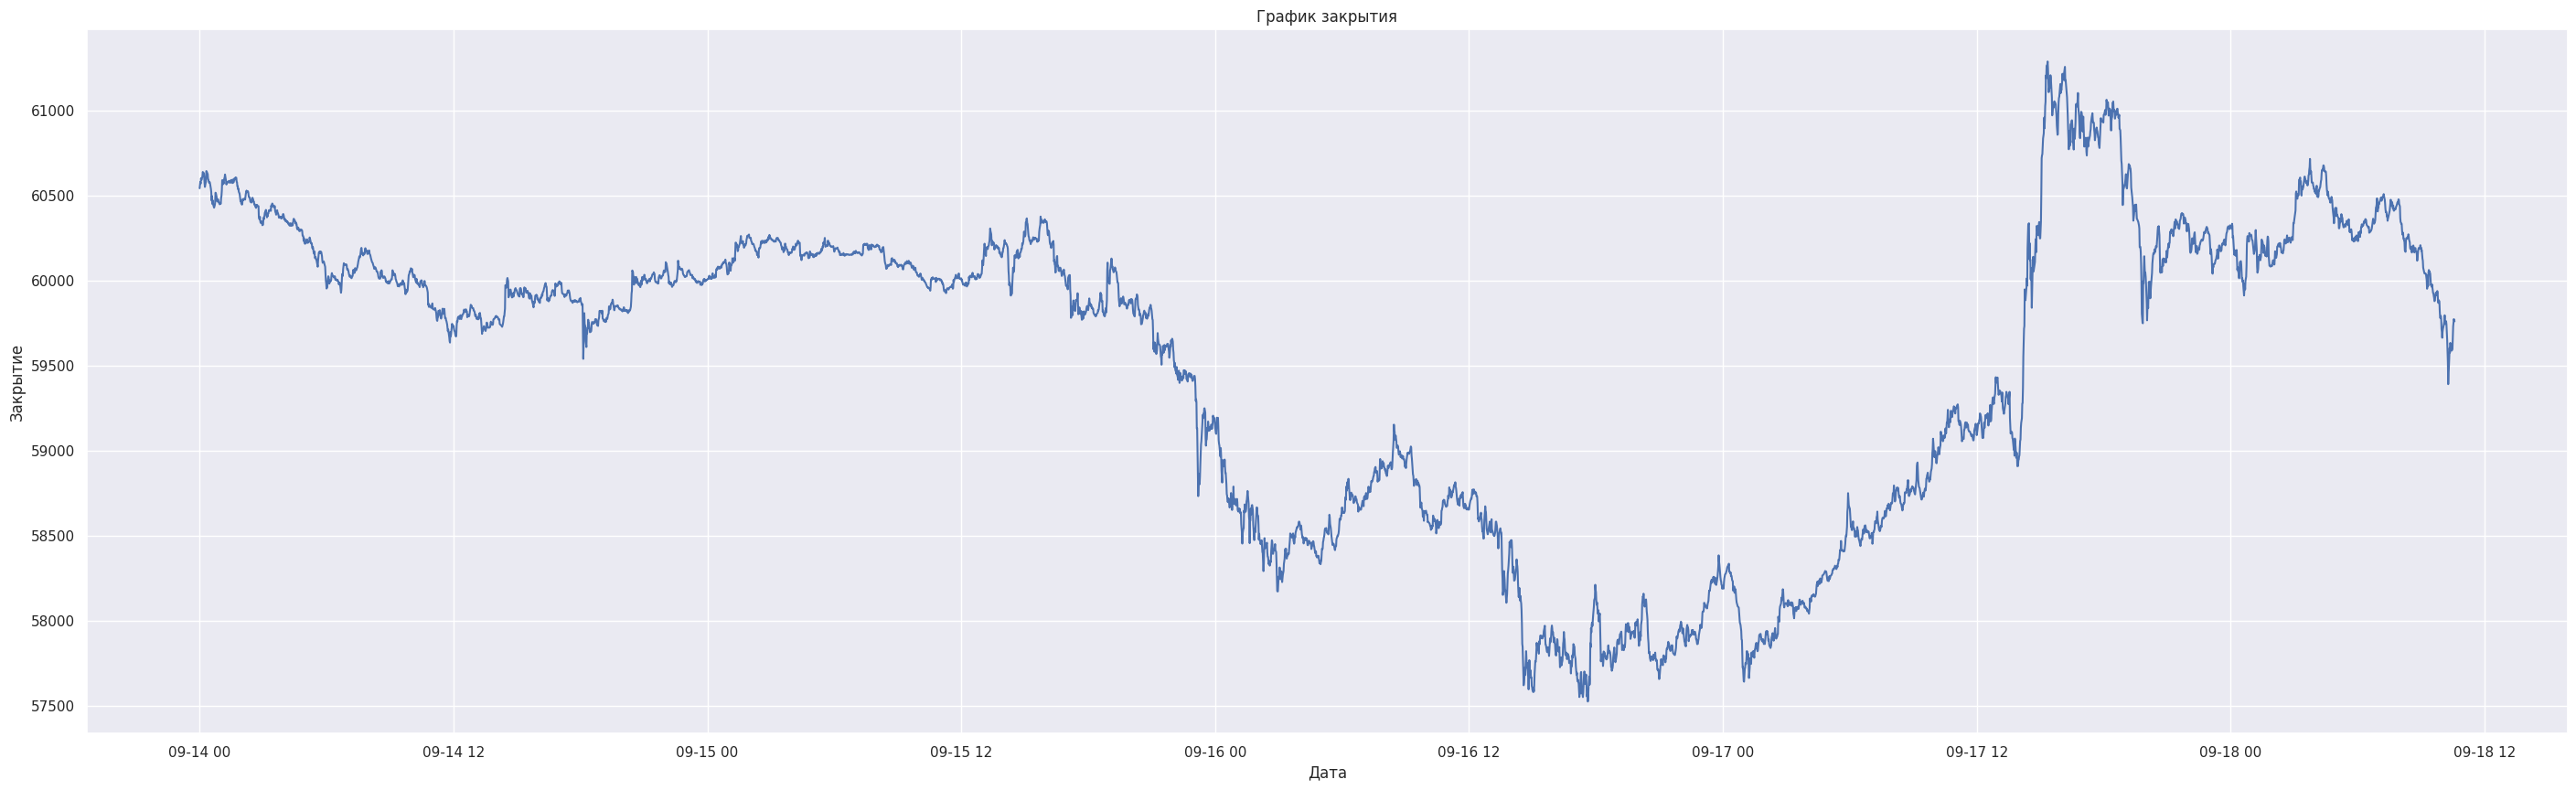

In [14]:
y = data['Close']
x = data['Datetime']
plt.figure(figsize = (35,10))
#sns.lineplot(x,y, legend='auto')
sns.lineplot(x=x, y=y, legend='auto')
plt.title('График закрытия')
plt.xlabel('Дата')
plt.ylabel('Закрытие')
plt.show()



In [15]:
prices = data.copy()

In [16]:
prices = prices.head(300)

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of labels (300).

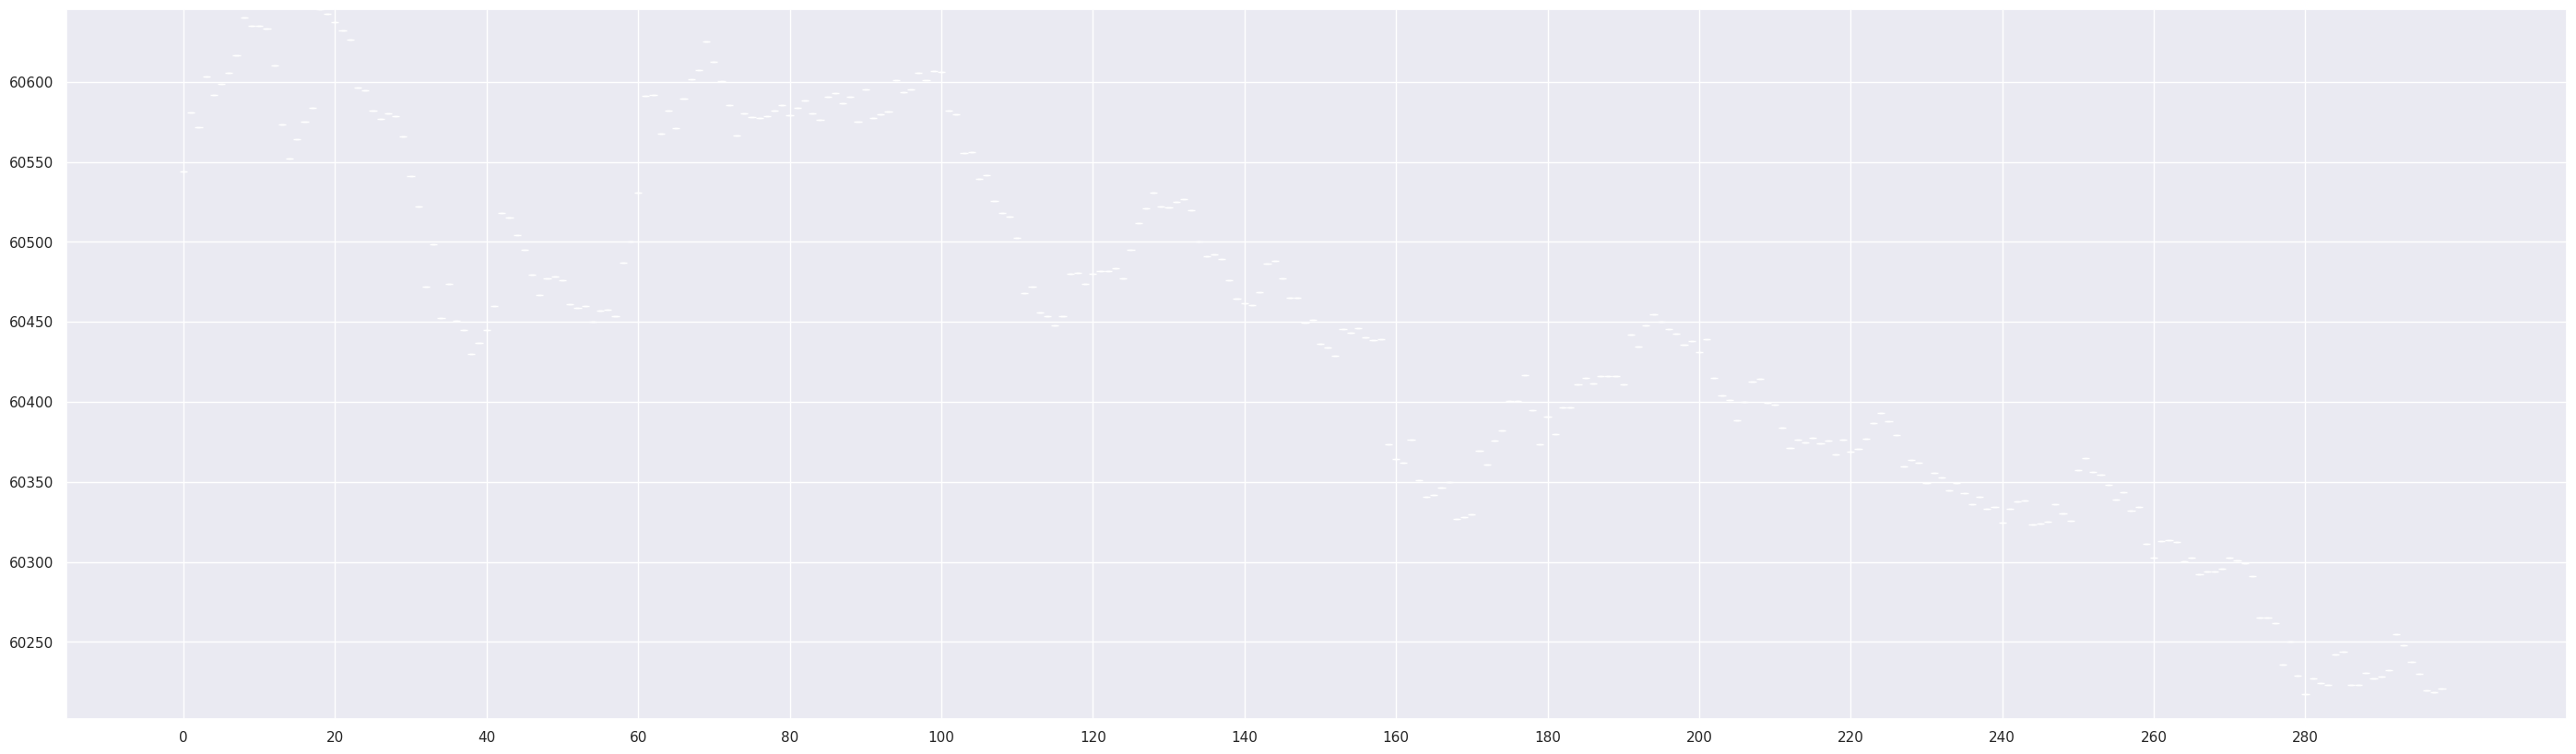

In [17]:
import matplotlib
# plt.figure(figsize = (100,20))
width=1
width2=0.5
pricesup=prices[prices.Close>=prices.Open]
pricesdown=prices[prices.Close<prices.Open]

plt.bar(pricesup.index,pricesup.Close-pricesup.Open,width,bottom=pricesup.Open,color=['g'])
plt.bar(pricesup.index,pricesup.High-pricesup.Close,width2,bottom=pricesup.Close,color=['g'])
plt.bar(pricesup.index,pricesup.Low-pricesup.Open,width2,bottom=pricesup.Open,color=['g'])

plt.bar(pricesdown.index,pricesdown.Close-pricesdown.Open,width,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.High-pricesdown.Open,width2,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.Low-pricesdown.Close,width2, bottom=pricesdown.Close,color='red')
plt.xticks(np.arange(len(prices),step = 20), labels = prices.Datetime.dt.time)
plt.xlabel('Time (2020-08-28)', labelpad = 10)
plt.ylabel('Price', labelpad = 10)
plt.title('Candlestick Chart (5M)')
plt.grid()

In [18]:
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [19]:
len(train)

4420

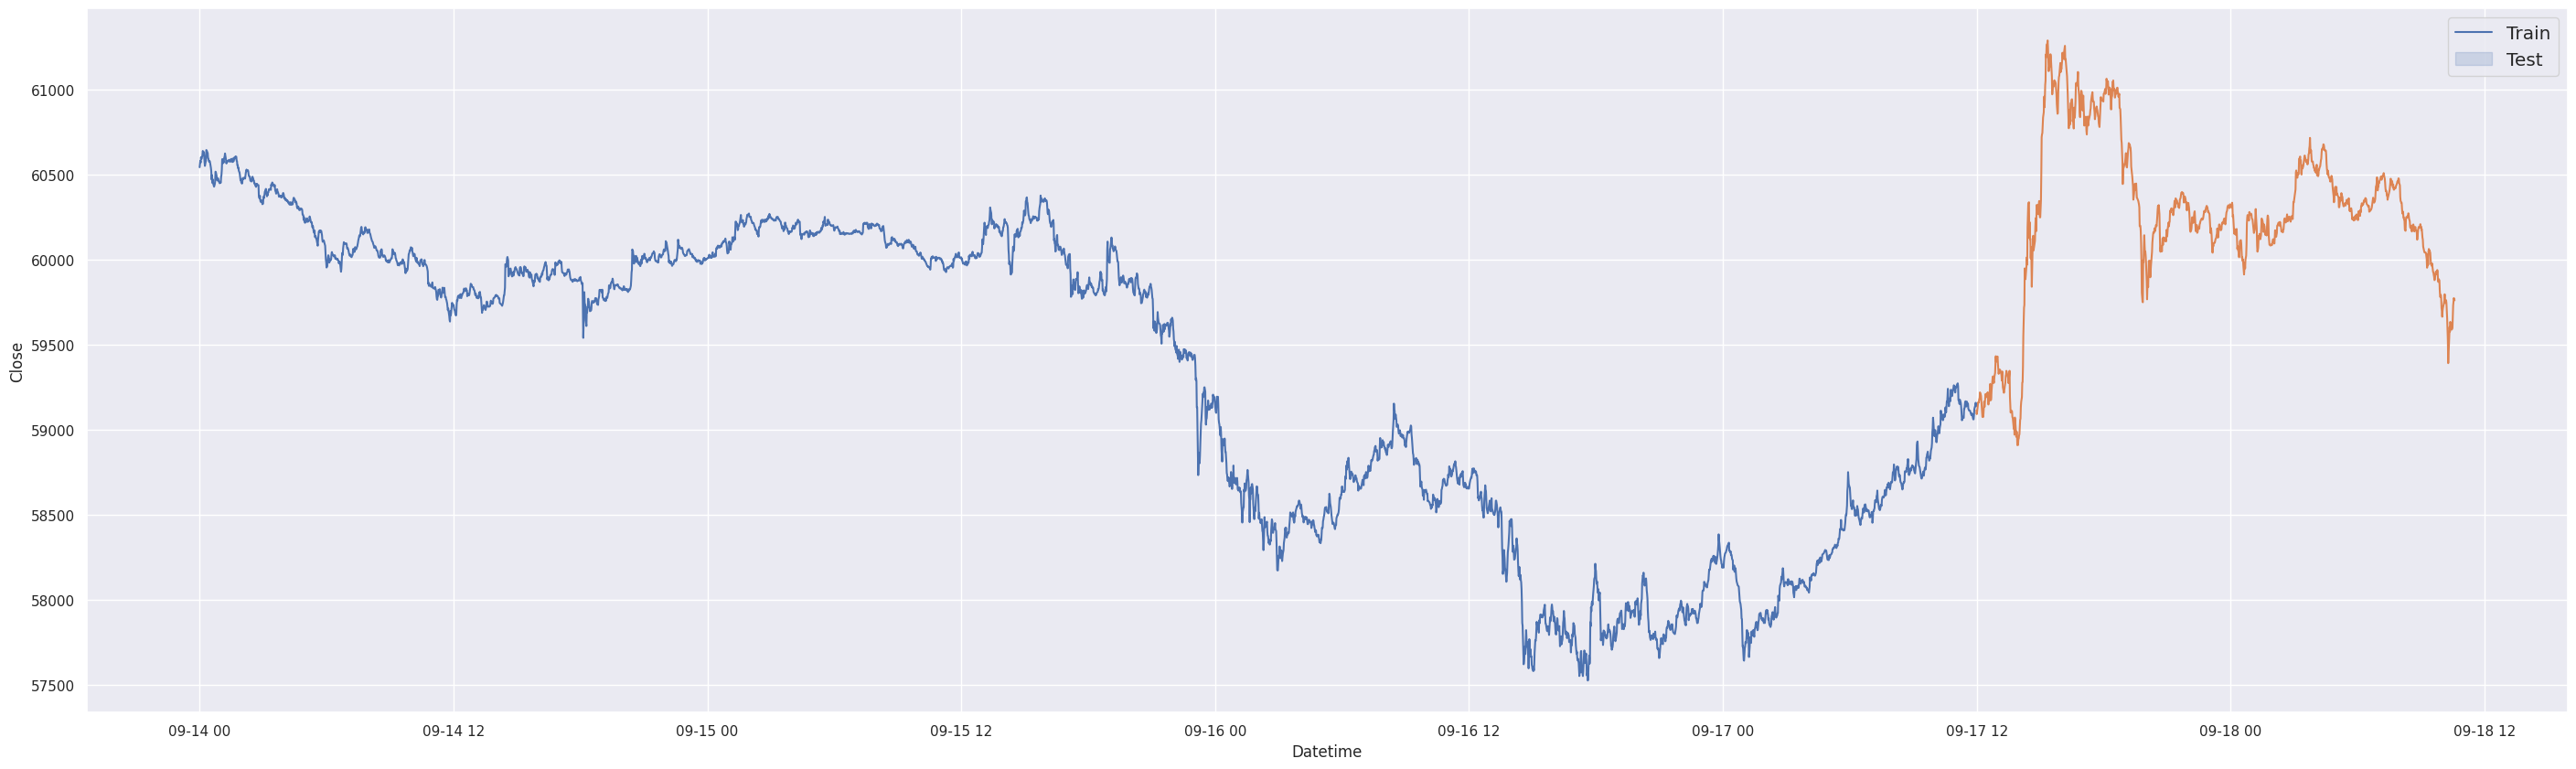

In [20]:
g = sns.lineplot(x = train['Datetime'],y = train['Close'])
g = sns.lineplot(x = test['Datetime'],y = test['Close'])
plt.legend(labels = ['Train', 'Test'], loc = 'best', fontsize = 'large')
plt.show(g)

# Feature Engineering

In [21]:
trainf = train['Close']

In [22]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = trainf.copy()
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [23]:
raw_seq[:6]

,Close
0,60544.226562
1,60580.953125
2,60571.500000
3,60603.417969
4,60591.789062
5,60598.773438


In [24]:
for i in range(5):
  print('train_x: ',X[i],'train_y: ',y[i])

train_x:  [60544.2265625  60580.953125   60571.5        60603.41796875
 60591.7890625 ] train_y:  60598.7734375
train_x:  [60580.953125   60571.5        60603.41796875 60591.7890625
 60598.7734375 ] train_y:  60605.5
train_x:  [60571.5        60603.41796875 60591.7890625  60598.7734375
 60605.5       ] train_y:  60616.8515625
train_x:  [60603.41796875 60591.7890625  60598.7734375  60605.5
 60616.8515625 ] train_y:  60640.1640625
train_x:  [60591.7890625 60598.7734375 60605.5       60616.8515625 60640.1640625] train_y:  60634.82421875


In [25]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X)

In [26]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y.reshape(-1,1))

In [27]:
X.shape

(4415, 5)

In [28]:
for i in range(5):
  print('train_x: ',scaled_train[i],'train_y: ',scaled_y[i])    #Printing out a sample of input output pairs for a clear understanding

train_x:  [0.96751606 0.97929128 0.97626043 0.98649393 0.98276549] train_y:  [0.98500481]
train_x:  [0.97929128 0.97626043 0.98649393 0.98276549 0.98500481] train_y:  [0.98716147]
train_x:  [0.97626043 0.98649393 0.98276549 0.98500481 0.98716147] train_y:  [0.990801]
train_x:  [0.98649393 0.98276549 0.98500481 0.98716147 0.990801  ] train_y:  [0.99827542]
train_x:  [0.98276549 0.98500481 0.98716147 0.990801   0.99827542] train_y:  [0.99656337]


In [29]:
X,y = scaled_train, scaled_y

In [30]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(4415, 5, 1)

# Model

In [31]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [33]:
# define model
model = Sequential()
model.add(LSTM(100, activation='swish', input_shape=(n_steps, n_features), return_sequences=True))  #Newest Activation function found by Google
model.add(LSTM(50, activation = 'swish'))                                                           #You can also use a Relu, both works fine
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['mse'])

In [34]:
model.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - loss: 0.2109 - mse: 0.2109
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - loss: 0.0027 - mse: 0.0027
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - loss: 0.0017 - mse: 0.0017
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 185ms/step - loss: 9.5685e-04 - mse: 9.5685e-04
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 184ms/step - loss: 4.2502e-04 - mse: 4.2502e-04
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - loss: 2.8204e-04 - mse: 2.8204e-04
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 2.6618e-04 - mse: 2.6618e-04
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 2.4192e-04 - mse: 2.4192e-04
Epoch 9/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 191ms/step - loss: 2.8214e-04 - mse: 2.8214e-04
Epoch 10/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - loss: 2.8299e-04 - mse: 2.8299e-04
Epoch 11/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 187ms/step - loss: 2.7824e-04 - mse: 2.7824e-04
Epoch 12/10

In [35]:
pred = model.predict(X)
# pred = scaler_y.inverse_transform(pred)

138/138 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step


In [36]:
pred[:5]

array([[0.9924051 ],
       [0.99292403],
       [0.9947722 ],
       [0.9976145 ],
       [1.004879  ]], dtype=float32)

In [37]:
# y = scaler_y.inverse_transform(y)
y[:5]

array([[0.98500481],
       [0.98716147],
       [0.990801  ],
       [0.99827542],
       [0.99656337]])

In [38]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y,pred))

In [39]:
print('rmse: ',rmse)

rmse:  0.01144603572737694


In [40]:
train[:5]

,index,Datetime,Open,High,Low,Close,Adj Close,Volume
0,0,2024-09-14 00:00:00+00:00,60544.226562,60544.226562,60544.226562,60544.226562,60544.226562,0
1,1,2024-09-14 00:02:00+00:00,60580.953125,60580.953125,60580.953125,60580.953125,60580.953125,7041024
2,2,2024-09-14 00:03:00+00:00,60571.500000,60571.500000,60571.500000,60571.500000,60571.500000,3282944
3,3,2024-09-14 00:04:00+00:00,60603.417969,60603.417969,60603.417969,60603.417969,60603.417969,7403520
4,4,2024-09-14 00:05:00+00:00,60591.789062,60591.789062,60591.789062,60591.789062,60591.789062,17838080


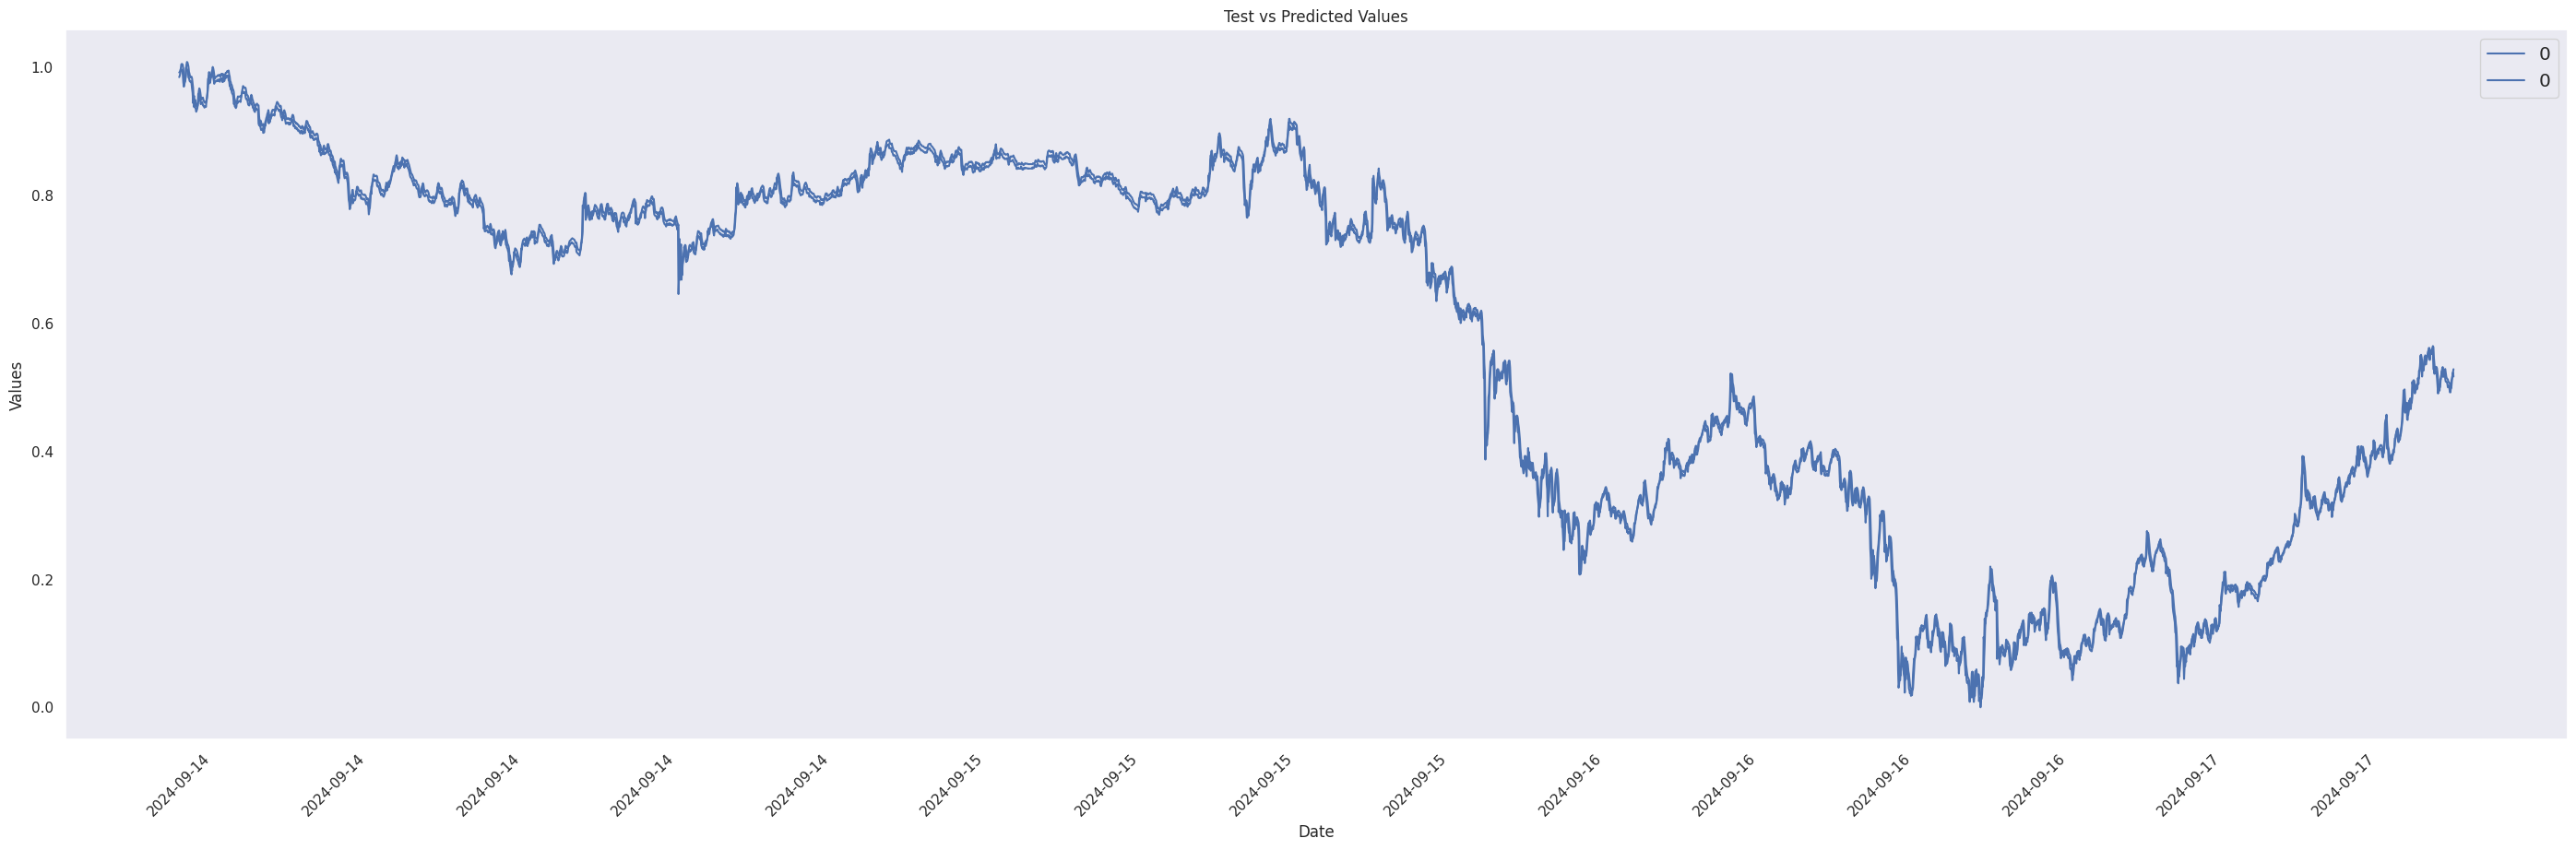

In [50]:
# @title Текст заголовка по умолчанию


# Построение линий для тестовых данных
sns.lineplot(data=y,  color='blue')

# Построение линий для предсказанных данных
sns.lineplot(data=pred,  color='red')

# Настройка легенды
plt.legend(loc='best', fontsize='large')

# Установка меток по оси X
tick_positions = np.arange(0, len(y), step=300)  # Позиции для меток
tick_labels = train['Datetime'].dt.date[tick_positions]  # Метки времени для этих позиций

plt.xticks(tick_positions, tick_labels, rotation=45)  # Устанавливаем метки на оси X с поворотом
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Test vs Predicted Values')
plt.grid()
plt.show()

In [51]:
testf = test['Close']

In [52]:
testf = testf.reset_index().drop('index',axis=1)

In [53]:
len(testf)

1105

In [54]:
testf = np.array(testf)

In [55]:
testf[:5]

array([[59114.56640625],
       [59092.84765625],
       [59125.234375  ],
       [59162.8125    ],
       [59160.640625  ]])

In [56]:
test_x,test_y = split_sequence(testf,5)

In [57]:
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1])

In [58]:
test_x = scaler.transform(test_x)

In [59]:
test_x[:5]

array([[0.50914014, 0.5021767 , 0.51256049, 0.52460874, 0.5239124 ],
       [0.5021767 , 0.51256049, 0.52460874, 0.5239124 , 0.52476279],
       [0.51256049, 0.52460874, 0.5239124 , 0.52476279, 0.53046254],
       [0.52460874, 0.5239124 , 0.52476279, 0.53046254, 0.53064915],
       [0.5239124 , 0.52476279, 0.53046254, 0.53064915, 0.54319837]])

In [60]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], n_features))
test_x.shape

(1100, 5, 1)

In [61]:
test_y[:5]

array([[59163.29296875],
       [59181.0703125 ],
       [59181.65234375],
       [59220.79296875],
       [59208.3828125 ]])

# Model Performance Breakdown

In [62]:
pred = model.predict(test_x)
scaled_test_y = scaler_y.transform(test_y)

rmse = np.sqrt(mean_squared_error(scaled_test_y,pred))
print('Normalised RMSE:',rmse)

inverse_pred = scaler_y.inverse_transform(pred)

rmse = np.sqrt(mean_squared_error(test_y,inverse_pred))
print('Absolute RMSE:', rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(scaled_test_y,pred)
print('Normalised MAPE: ',mape,'%')
mape = mean_absolute_percentage_error(test_y, inverse_pred)
print('Absolute MAPE: ',mape,'%')

 1/35 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
Normalised RMSE: 0.016347045220521446
Absolute RMSE: 50.986000891597165
Normalised MAPE:  1.426257950320922 %
Absolute MAPE:  0.062165519302151334 %


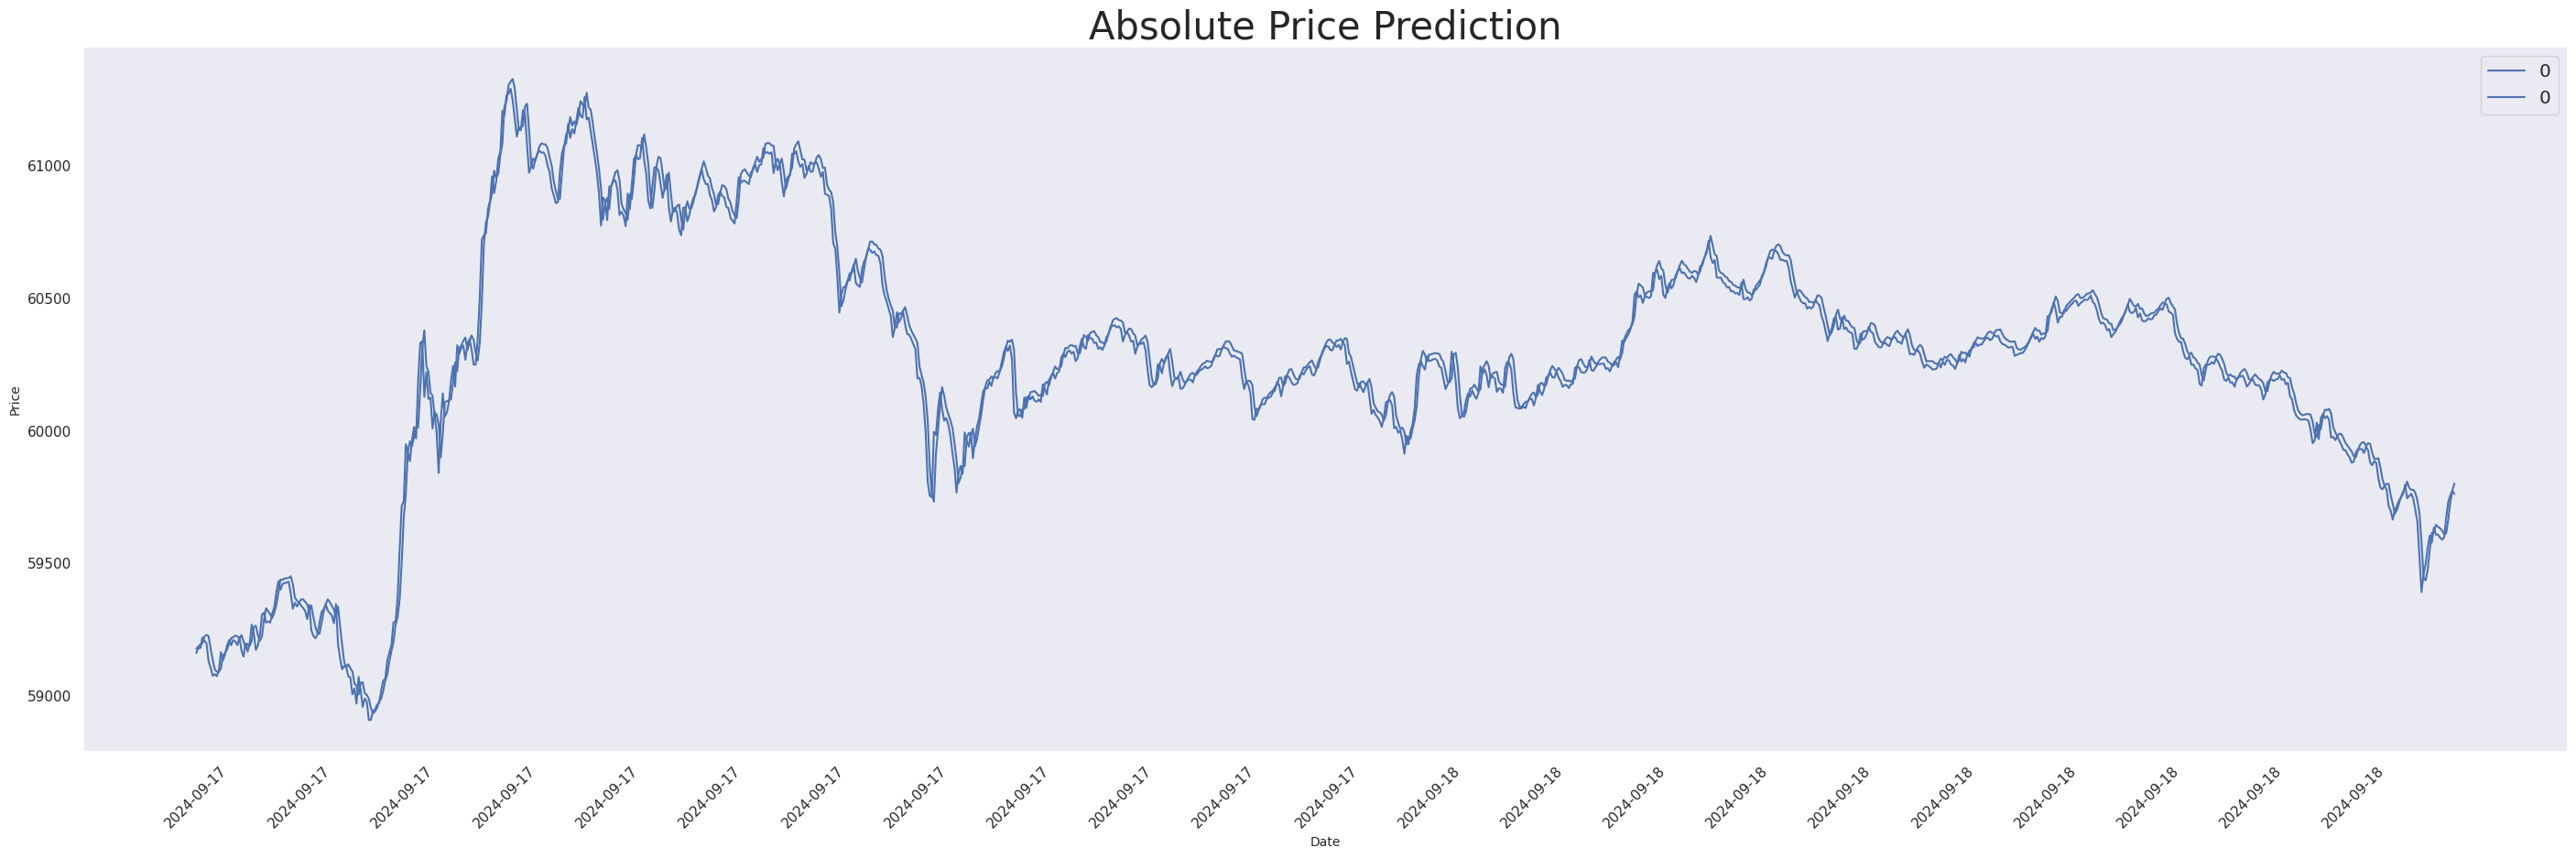

In [70]:
# Построение линий для тестовых данных
sns.lineplot(data=test_y, color='blue')

# Построение линий для предсказанных данных
sns.lineplot(data=inverse_pred, color='orange')

# Настройка легенды
plt.legend(loc='best', fontsize='large')

# Установка меток по оси X
tick_positions = np.arange(0, len(test_y), step=50)  # Позиции для меток
# Убедитесь, что tick_positions не превышает длину test['Datetime']
if len(tick_positions) > len(test['Datetime']):
    tick_positions = tick_positions[:len(test['Datetime'])]

# Получение меток времени для этих позиций
tick_labels = test['Datetime'].dt.date.iloc[tick_positions]  # Используем iloc для безопасного доступа

plt.xticks(tick_positions, tick_labels, rotation=45)  # Устанавливаем метки на оси X
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Absolute Price Prediction', fontsize=30)
plt.grid()
plt.show()

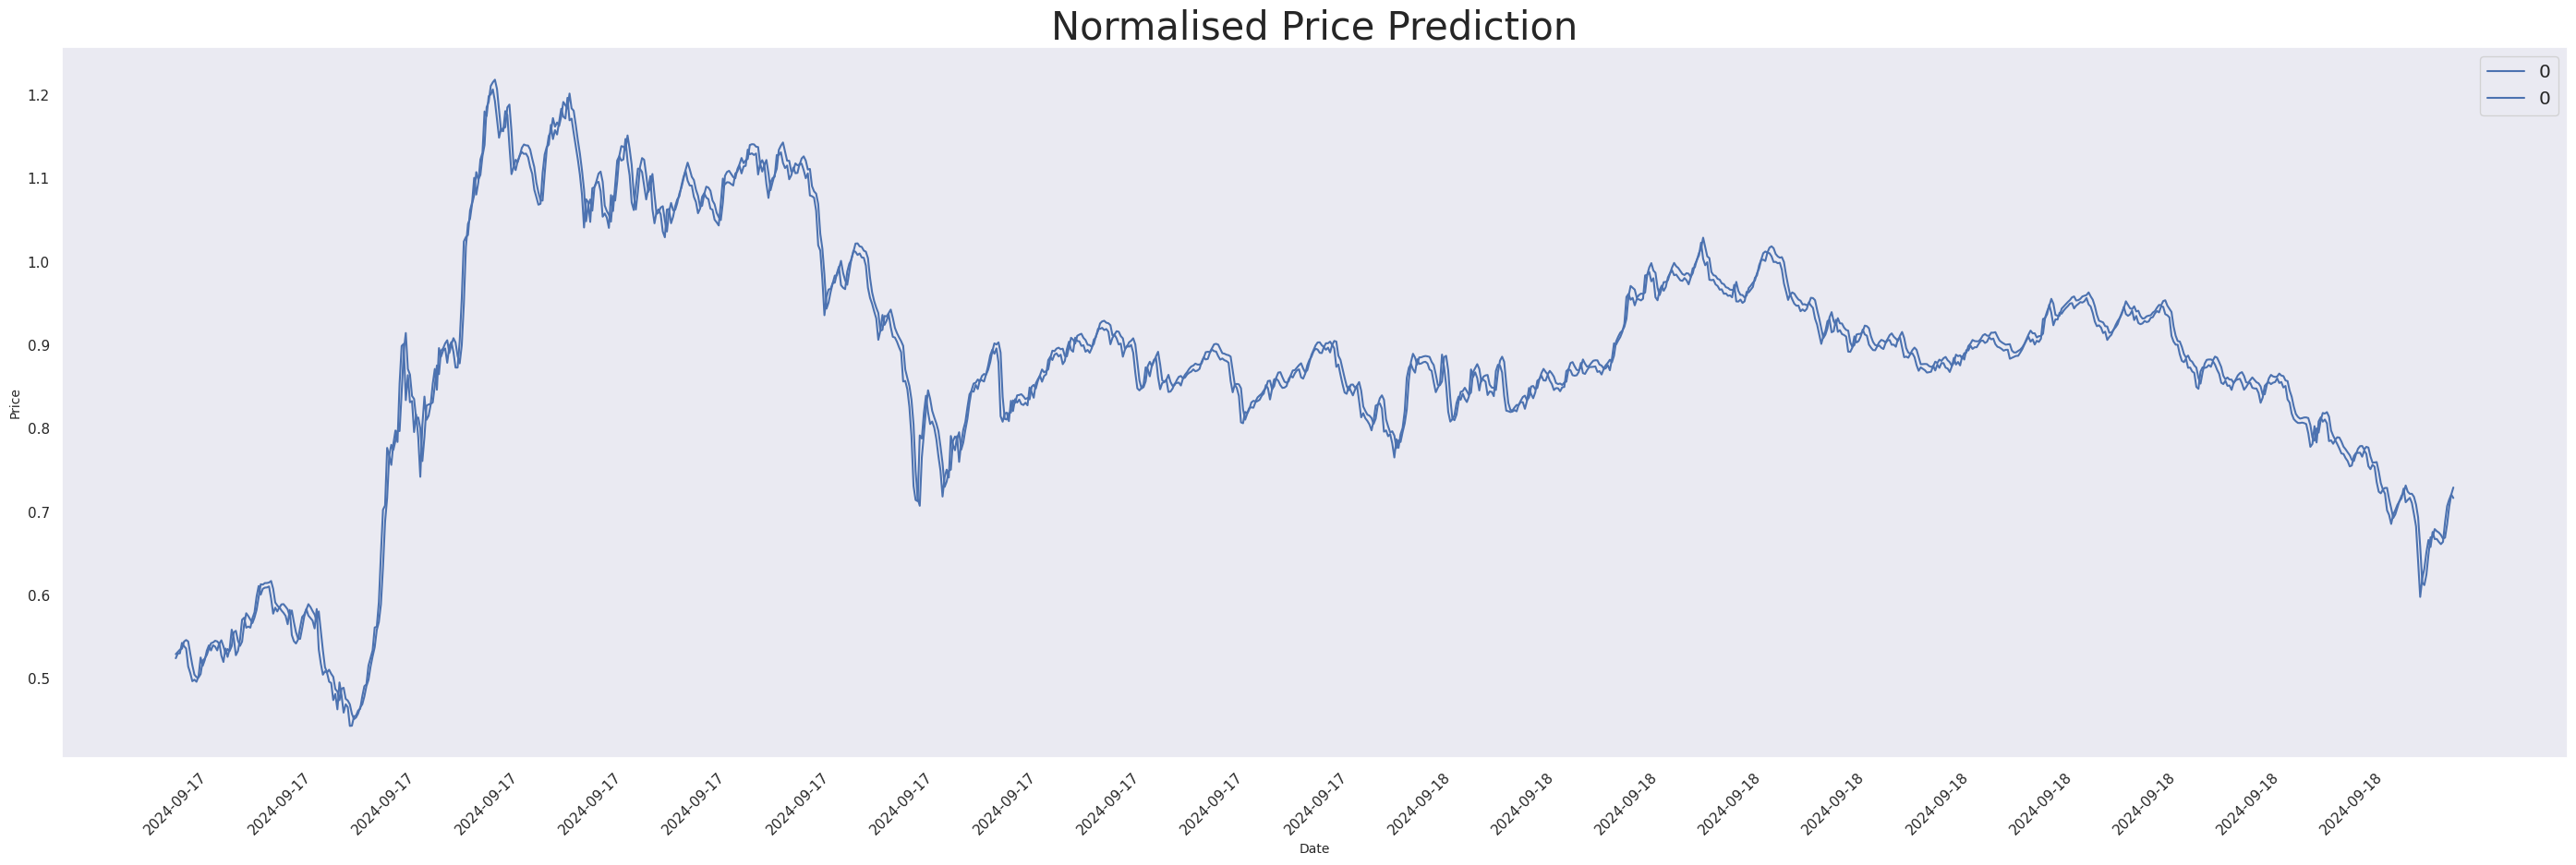

In [75]:
# Построение линий для тестовых данных
sns.lineplot(data=scaled_test_y, color='blue')

# Построение линий для предсказанных данных
sns.lineplot(data=pred, color='orange')

# Настройка легенды
plt.legend(loc='best', fontsize='large')

# Установка меток по оси X
tick_positions = np.arange(0, len(scaled_test_y), step=50)  # Позиции для меток

# Убедитесь, что tick_positions не превышает длину test['Datetime']
if len(tick_positions) > len(test['Datetime']):
    tick_positions = tick_positions[:len(test['Datetime'])]

# Получение меток времени для этих позиций
tick_labels = test['Datetime'].dt.date.iloc[tick_positions]  # Используем iloc для безопасного доступа

plt.xticks(tick_positions, tick_labels, rotation=45)  # Устанавливаем метки на оси X
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Normalised Price Prediction', fontsize=30)
plt.grid()
plt.show()

In [76]:
len(test_y)

1100

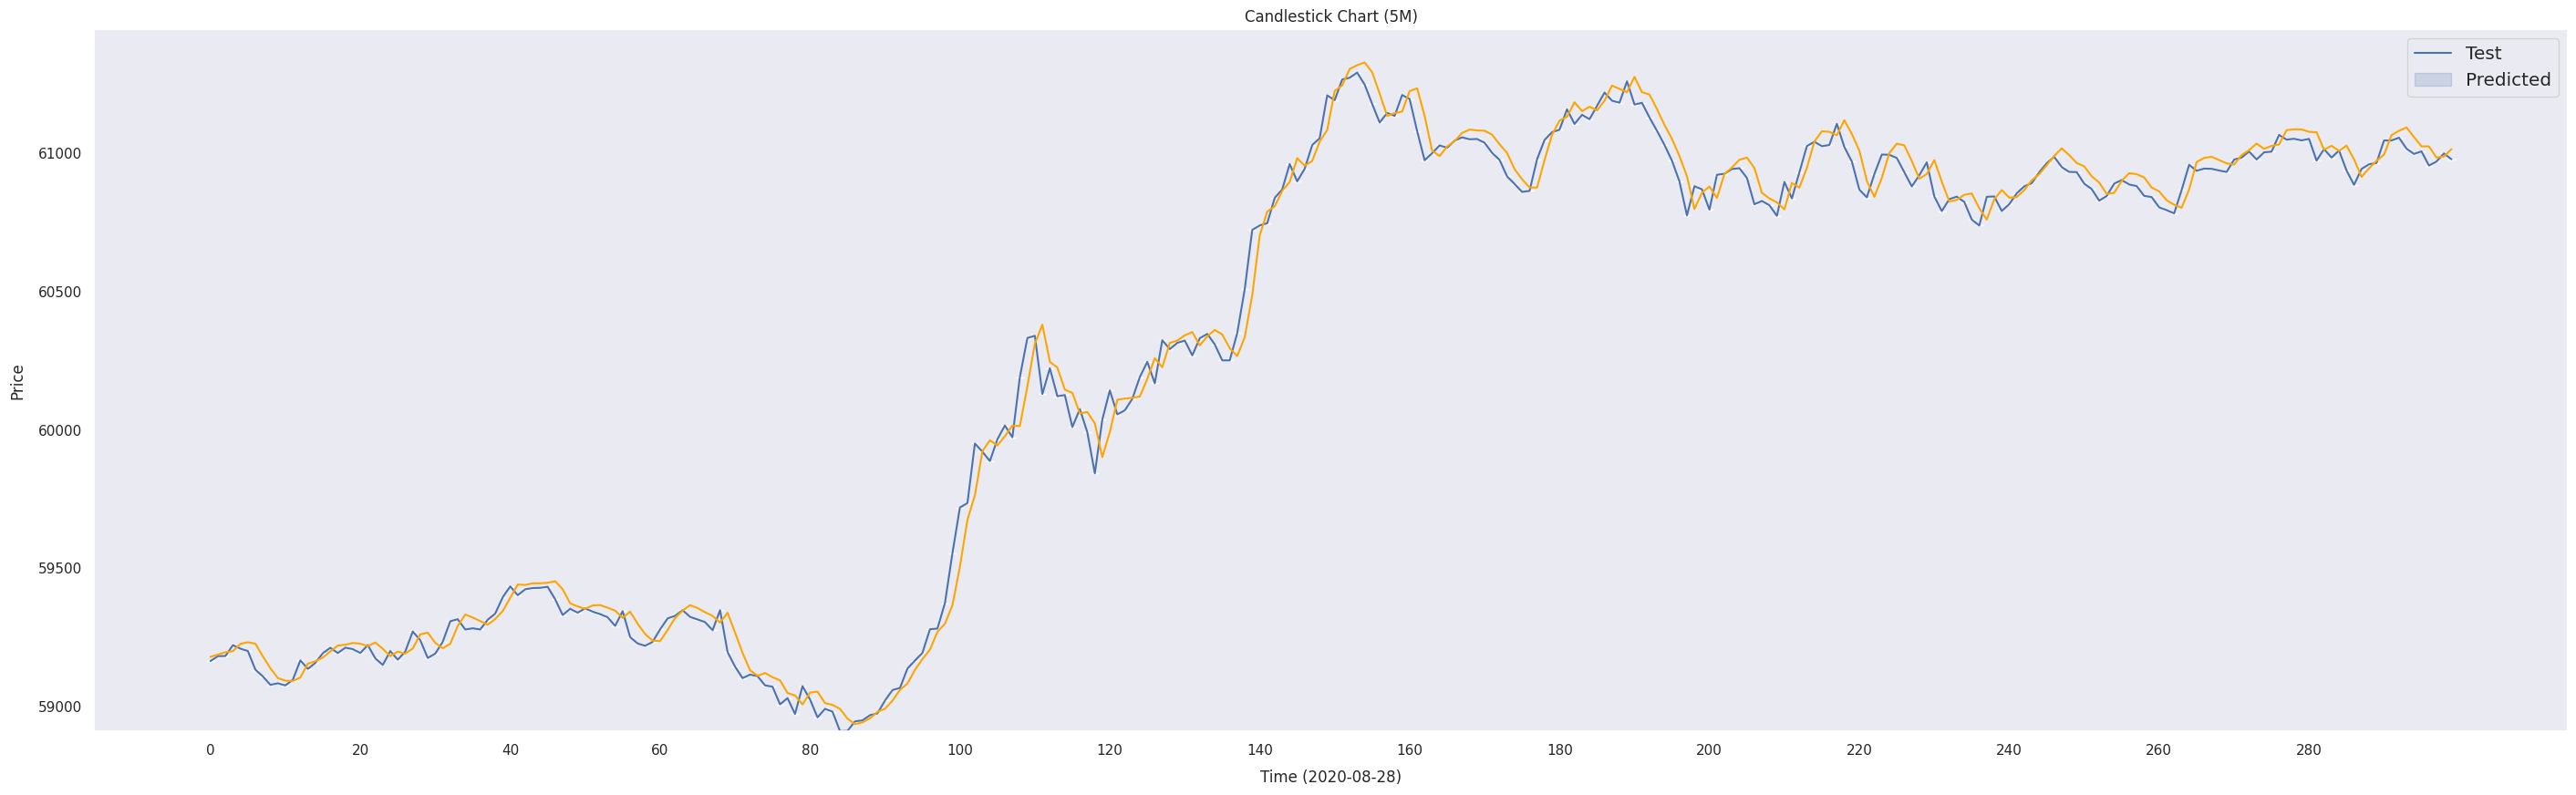

In [78]:
prices = test.copy()
prices = prices[5:305].reset_index().drop(['index'],axis=1)
width=1
width2=0.5
pricesup=prices[prices.Close>=prices.Open]
pricesdown=prices[prices.Close<prices.Open]

plt.bar(pricesup.index,pricesup.Close-pricesup.Open,width,bottom=pricesup.Open,color='g')
plt.bar(pricesup.index,pricesup.High-pricesup.Close,width2,bottom=pricesup.Close,color='g')
plt.bar(pricesup.index,pricesup.Low-pricesup.Open,width2,bottom=pricesup.Open,color='g')

plt.bar(pricesdown.index,pricesdown.Close-pricesdown.Open,width,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.High-pricesdown.Open,width2,bottom=pricesdown.Open,color='red')
plt.bar(pricesdown.index,pricesdown.Low-pricesdown.Close,width2, bottom=pricesdown.Close,color='red')

sns.lineplot(data = test_y[:300])
sns.lineplot(data = inverse_pred[:300], palette = ['orange'])
plt.legend(labels = ['Test', 'Predicted'], loc = 'best', fontsize = 'large')

plt.xticks(np.arange(len(prices),step = 20)) #, labels = prices.Datetime.dt.time)
plt.xlabel('Time (2020-08-28)', labelpad = 10)
plt.ylabel('Price', labelpad = 10)
plt.title('Candlestick Chart (5M)')
plt.grid()

In [79]:
test.head()

,index,Datetime,Open,High,Low,Close,Adj Close,Volume
4420,4420,2024-09-17 11:59:00+00:00,59114.566406,59114.566406,59114.566406,59114.566406,59114.566406,57477120
4421,4421,2024-09-17 12:00:00+00:00,59092.847656,59092.847656,59092.847656,59092.847656,59092.847656,534528
4422,4422,2024-09-17 12:02:00+00:00,59125.234375,59125.234375,59125.234375,59125.234375,59125.234375,0
4423,4423,2024-09-17 12:04:00+00:00,59162.812500,59162.812500,59162.812500,59162.812500,59162.812500,11687936
4424,4424,2024-09-17 12:05:00+00:00,59160.640625,59160.640625,59160.640625,59160.640625,59160.640625,6416384


In [80]:
len(test)

1105

In [81]:
len(inverse_pred)

1100

In [82]:
temp = [0]*5

In [83]:
temp = np.concatenate((np.array(temp).reshape(-1,1),inverse_pred))
len(temp)

1105

In [84]:
test['Predicted_Close'] = temp

In [85]:
# test.to_csv('/content/drive/MyDrive/Stocks_pred/LSTM.csv',header=True,index=True)

**Realtime Monitor**

In [87]:
import pytz
import time
import datetime as dt
!pip install yahoo_fin
from yahoo_fin import stock_info as si

In [88]:
test['Close'].tail(4)

,Close
5521,59732.132812
5522,59756.554688
5523,59775.160156
5524,59762.308594


In [89]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [90]:
################### Please use this block only if you want to check if the api is fetching the live prices properly ###########################

# tz = pytz.timezone('Asia/Kolkata')
# while True:
#   min = dt.datetime.now(tz = tz).minute
#   if (min%1 == 0 and (dt.datetime.now(tz=tz).second % 60) == 0):
#     print(si.get_live_price("BTC-USD"))
#   time.sleep(1)

In [ ]:
#Make a queue to render the real-time data into it used as input for the model
tz = pytz.timezone('Europe/Moscow')
data_queue = list(test['Close'].tail(5))       #Input
predictions = [0,0]                           #To keep track of past and the present predictions made by the model
temp = []                                     #To keep track of P/L
print("data -> ",data_queue)
count = 0
p_nd_l = 0
_df = []
p = None
while True:
  min = dt.datetime.now(tz = tz).minute
  if (min%1 == 0 and (dt.datetime.now(tz=tz).second % 60) == 0):
    try:
      price = si.get_live_price(stock_name)       #Live quotes
    except ValueError:
      continue
    print("\nmin_",min,":",price)

    data_queue.pop(0)
    data_queue.append(price)
    print("data -> ",data_queue)

    if count>=5:

      scaled_data = scaler.transform(np.array(data_queue).reshape(1,-1))
      n_features = 1
      scaled_data = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], n_features))
      pred = model.predict(scaled_data)
      inv_pred = np.rint(scaler_y.inverse_transform(pred))

      print("Prediction -> ",inv_pred,'\n')
      predictions.pop(0)
      predictions.append(inv_pred)

      _p = p

      print("_p: ",_p,"p: ",p)

      if (predictions[1] - predictions[0] > 0):
          p = 1
          print("BUY")
          _ = 'BUY'
          temp.append(price)
          print("temp -> ",temp)

      else:
          p = 0
          print("SELL")
          _ = 'SELL'
          temp.append(price)
          print("temp -> ",temp)

      if (_p != p):
        if (p==1 and _p==0):
          p_nd_l+=temp[0]-temp[-1]
          temp = []
          p = None
        if (p==0 and _p==1):
          p_nd_l+=temp[-1]-temp[0]
          temp = []
          p = None

      print("_p: ",_p,"p: ",p)
      print("P/L: ",p_nd_l,'\n')
      _df.append([_,temp,p_nd_l,dt.datetime.now(tz = tz)])

    count+=1

  time.sleep(1)

data ->  [59672.34375, 59732.1328125, 59756.5546875, 59775.16015625, 59762.30859375]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]



min_ 49 : 59574.7109375
data ->  [59732.1328125, 59756.5546875, 59775.16015625, 59762.30859375, 59574.7109375]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]



min_ 50 : 59522.4453125
data ->  [59756.5546875, 59775.16015625, 59762.30859375, 59574.7109375, 59522.4453125]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]



min_ 51 : 59492.74609375
data ->  [59775.16015625, 59762.30859375, 59574.7109375, 59522.4453125, 59492.74609375]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]



min_ 52 : 59553.50390625
data ->  [59762.30859375, 59574.7109375, 59522.4453125, 59492.74609375, 59553.50390625]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]



min_ 53 : 59553.50390625
data ->  [59574.7109375, 59522.4453125, 59492.74609375, 59553.50390625, 59553.50390625]


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



min_ 54 : 59546.4921875
data ->  [59522.4453125, 59492.74609375, 59553.50390625, 59553.50390625, 59546.4921875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Prediction ->  [[59572.]] 

_p:  None p:  None
BUY
temp ->  [59546.4921875]
_p:  None p:  1
P/L:  0 



/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



min_ 55 : 59490.65625
data ->  [59492.74609375, 59553.50390625, 59553.50390625, 59546.4921875, 59490.65625]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction ->  [[59536.]] 

_p:  1 p:  1
SELL
temp ->  [59546.4921875, 59490.65625]
_p:  1 p:  None
P/L:  -55.8359375 


min_ 56 : 59447.4375
data ->  [59553.50390625, 59553.50390625, 59546.4921875, 59490.65625, 59447.4375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59483.]] 

_p:  None p:  None
SELL
temp ->  [59447.4375]
_p:  None p:  0
P/L:  -55.8359375 


min_ 57 : 59447.4375
data ->  [59553.50390625, 59546.4921875, 59490.65625, 59447.4375, 59447.4375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59461.]] 

_p:  0 p:  0
SELL
temp ->  [59447.4375, 59447.4375]
_p:  0 p:  0
P/L:  -55.8359375 


min_ 58 : 59441.11328125
data ->  [59546.4921875, 59490.65625, 59447.4375, 59447.4375, 59441.11328125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59453.]] 

_p:  0 p:  0
SELL
temp ->  [59447.4375, 59447.4375, 59441.11328125]
_p:  0 p:  0
P/L:  -55.8359375 


min_ 59 : 59405.62890625
data ->  [59490.65625, 59447.4375, 59447.4375, 59441.11328125, 59405.62890625]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59434.]] 

_p:  0 p:  0
SELL
temp ->  [59447.4375, 59447.4375, 59441.11328125, 59405.62890625]
_p:  0 p:  0
P/L:  -55.8359375 


min_ 0 : 59405.62890625
data ->  [59447.4375, 59447.4375, 59441.11328125, 59405.62890625, 59405.62890625]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59425.]] 

_p:  0 p:  0
SELL
temp ->  [59447.4375, 59447.4375, 59441.11328125, 59405.62890625, 59405.62890625]
_p:  0 p:  0
P/L:  -55.8359375 


min_ 1 : 59439.79296875
data ->  [59447.4375, 59441.11328125, 59405.62890625, 59405.62890625, 59439.79296875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59442.]] 

_p:  0 p:  0
BUY
temp ->  [59447.4375, 59447.4375, 59441.11328125, 59405.62890625, 59405.62890625, 59439.79296875]
_p:  0 p:  None
P/L:  -48.19140625 


min_ 2 : 59494.96484375
data ->  [59441.11328125, 59405.62890625, 59405.62890625, 59439.79296875, 59494.96484375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59490.]] 

_p:  None p:  None
BUY
temp ->  [59494.96484375]
_p:  None p:  1
P/L:  -48.19140625 


min_ 3 : 59494.96484375
data ->  [59405.62890625, 59405.62890625, 59439.79296875, 59494.96484375, 59494.96484375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59516.]] 

_p:  1 p:  1
BUY
temp ->  [59494.96484375, 59494.96484375]
_p:  1 p:  1
P/L:  -48.19140625 


min_ 4 : 59442.20703125
data ->  [59405.62890625, 59439.79296875, 59494.96484375, 59494.96484375, 59442.20703125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59490.]] 

_p:  1 p:  1
SELL
temp ->  [59494.96484375, 59494.96484375, 59442.20703125]
_p:  1 p:  None
P/L:  -100.94921875 


min_ 5 : 59442.20703125
data ->  [59439.79296875, 59494.96484375, 59494.96484375, 59442.20703125, 59442.20703125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59468.]] 

_p:  None p:  None
SELL
temp ->  [59442.20703125]
_p:  None p:  0
P/L:  -100.94921875 


min_ 6 : 59576.2890625
data ->  [59494.96484375, 59494.96484375, 59442.20703125, 59442.20703125, 59576.2890625]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59542.]] 

_p:  0 p:  0
BUY
temp ->  [59442.20703125, 59576.2890625]
_p:  0 p:  None
P/L:  -235.03125 


min_ 7 : 59541.453125
data ->  [59494.96484375, 59442.20703125, 59442.20703125, 59576.2890625, 59541.453125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Prediction ->  [[59565.]] 

_p:  None p:  None
BUY
temp ->  [59541.453125]
_p:  None p:  1
P/L:  -235.03125 


min_ 8 : 59353.9609375
data ->  [59442.20703125, 59442.20703125, 59576.2890625, 59541.453125, 59353.9609375]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Prediction ->  [[59456.]] 

_p:  1 p:  1
SELL
temp ->  [59541.453125, 59353.9609375]
_p:  1 p:  None
P/L:  -422.5234375 



/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



min_ 9 : 59454.20703125
data ->  [59442.20703125, 59576.2890625, 59541.453125, 59353.9609375, 59454.20703125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction ->  [[59450.]] 

_p:  None p:  None
SELL
temp ->  [59454.20703125]
_p:  None p:  0
P/L:  -422.5234375 



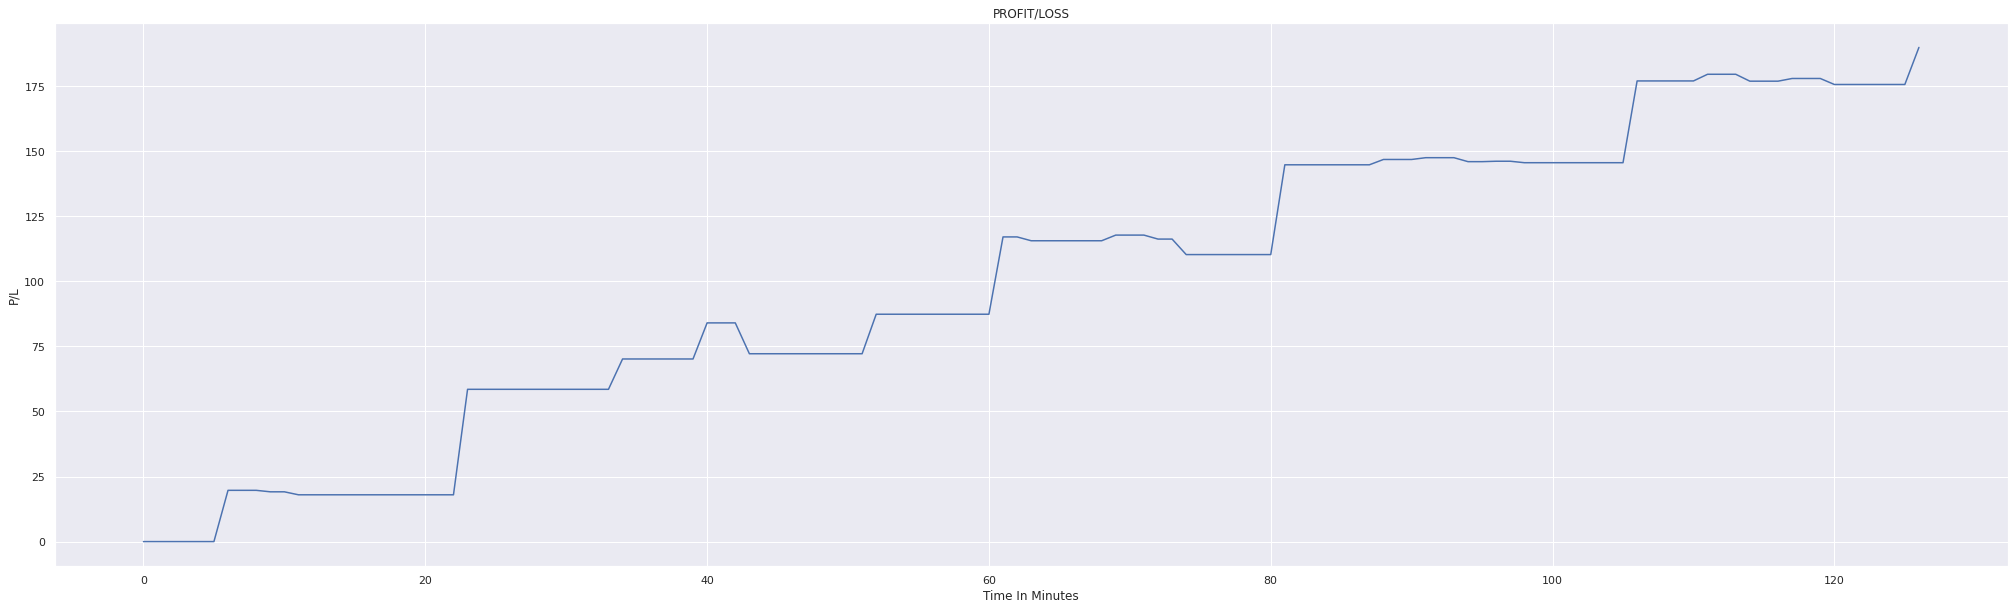

In [ ]:
df = pd.DataFrame(_df, columns = ['BUY/SELL Calls','Price','P/L','DateTime'])
sns.lineplot(data = df['P/L'])
plt.title("PROFIT/LOSS")
plt.xlabel('Time In Minutes')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Stocks_pred/PndL(3).csv',header=True,index=True)

In [ ]:
_df1 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL.csv')
_df2 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(1).csv')
_df3 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(2).csv')
_df4 = pd.read_csv('/content/drive/MyDrive/Stocks_pred/PndL(3).csv')

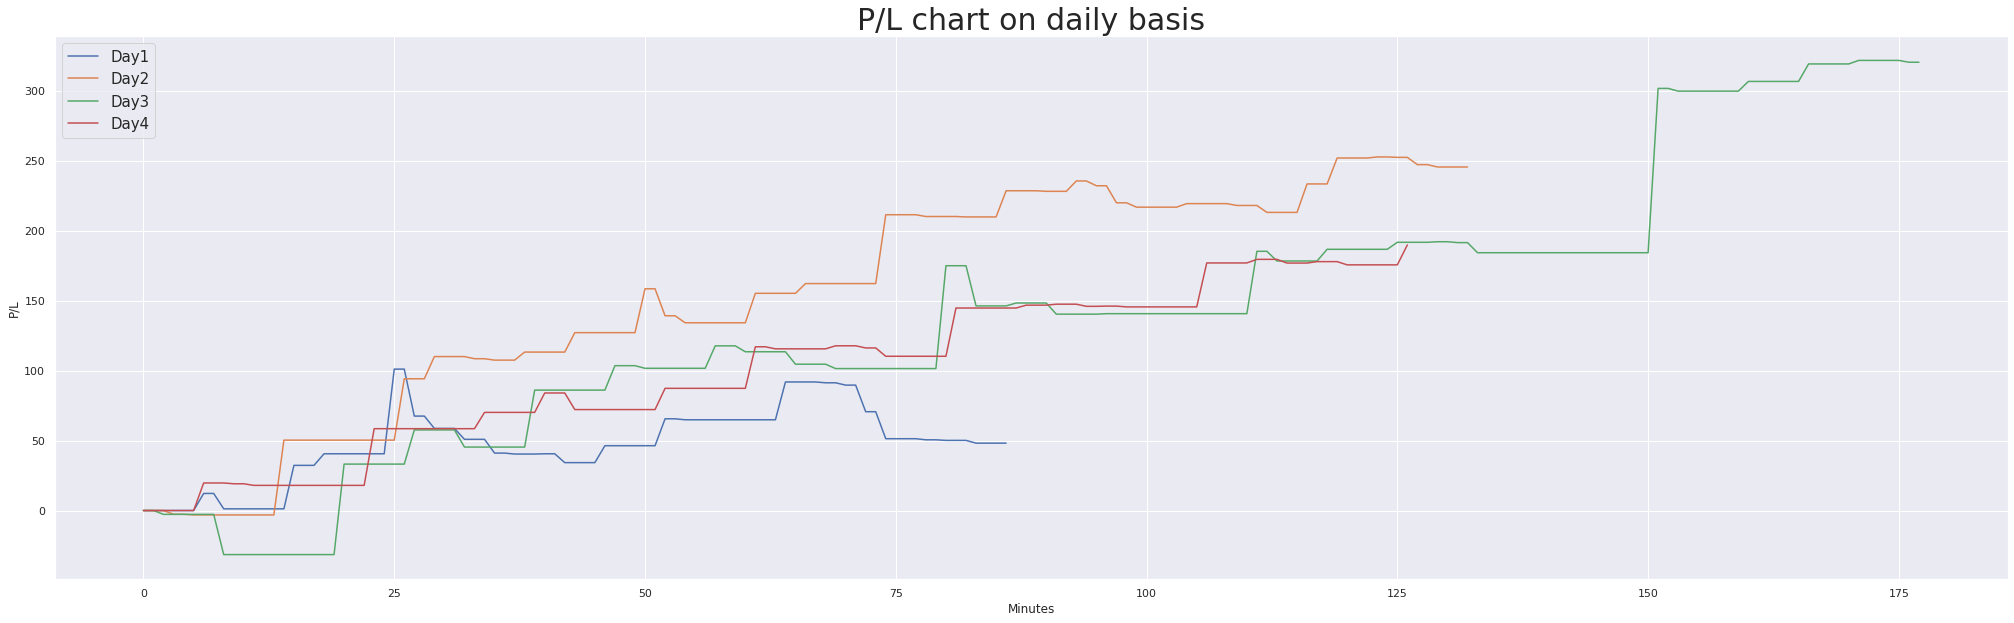

In [ ]:
sns.lineplot(data = _df1['P/L'])
sns.lineplot(data = _df2['P/L'])
sns.lineplot(data = _df3['P/L'])
sns.lineplot(data = _df4['P/L'])
plt.title("P/L chart on daily basis",fontsize = 30)
plt.xlabel('Minutes')
plt.legend(labels = ['Day1','Day2','Day3','Day4'], fontsize=15)
plt.show()